In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Read the dataset to the python environment

In [2]:
data = pd.read_excel("Downloads\iris (4).xls")

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [6]:
data.shape

(150, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

SL,SW and PL contain null values, and this null values has to be removed

In [9]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 2. Do necessary pre-processing steps.


# Removing null values from data

In [10]:
for i in ['SL', 'SW','PL']:
      data[i]=data[i].fillna(data[i].mean())

In [11]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Removing Outliers

Text(0.5, 1.0, 'SL, SW, PL, PW')

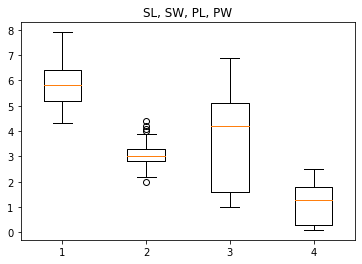

In [12]:
plt.boxplot(data[['SL','SW','PL','PW']])
plt.title('SL, SW, PL, PW')

Outliers are present in SW

In [13]:
Q1 = np.percentile(data['SW'],25, interpolation = 'midpoint')
Q2 = np.percentile(data['SW'],50, interpolation = 'midpoint')
Q3 = np.percentile(data['SW'],75, interpolation = 'midpoint')
IQR = Q3-Q1
upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)
print('Lower limit=',lower_limit)
print('Upper limit=',upper_limit)

Lower limit= 2.1249999999999996
Upper limit= 3.9250000000000003


In [14]:
outlier = []
for x in data['SW']:
    if ((x < lower_limit) or (x > upper_limit)):
        outlier.append(x)
print("Outliers are",outlier)

Outliers are [4.0, 4.4, 4.1, 4.2, 2.0]


In [15]:
ind1 = data['SW'] > upper_limit
ind2 = data['SW'] < lower_limit
data.loc[ind1].index


Int64Index([14, 15, 32, 33], dtype='int64')

In [16]:
data.loc[ind2].index

Int64Index([60], dtype='int64')

In [17]:
data.drop((data.loc[ind1].index), inplace = True)
 

In [18]:
data.drop((data.loc[ind2].index), inplace = True)


Text(0.5, 1.0, 'Box plot of SW after removing outliers')

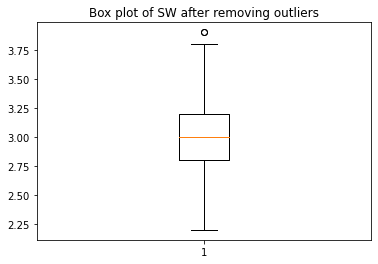

In [19]:
plt.boxplot(data['SW'])
plt.title('Box plot of SW after removing outliers')

Outliers present in SW has been removed

# Splitting and Scaling

In [20]:
y = data['Classification']
X = data.drop(['Classification'],axis=1)

In [21]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
X = min_max.fit_transform(X)
X = pd.DataFrame(X)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=65, test_size = 0.2)

In [23]:
X_train.shape

(116, 4)

In [24]:
X_test.shape

(29, 4)

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)


# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
y_predict = logistic_model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score


In [27]:
print("Accuracy of Logistic Regression model=", accuracy_score(y_test,y_predict))


Accuracy of Logistic Regression model= 0.9310344827586207


# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski')
    classifier.fit(X_train, y_train)
    y_predict = classifier.predict(X_test)
    acc= accuracy_score(y_test, y_predict)
    acc_values.append(acc)
acc_values

[0.896551724137931,
 0.9310344827586207,
 0.9655172413793104,
 0.9310344827586207,
 0.9655172413793104,
 0.9310344827586207,
 0.9310344827586207,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.9310344827586207,
 0.896551724137931]

Text(0, 0.5, 'accuracy')

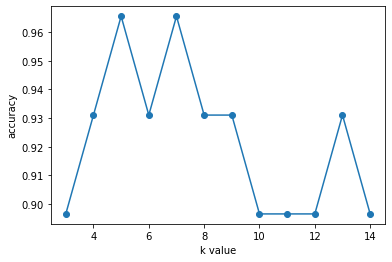

In [30]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [31]:
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski')
classifier.fit(X_train, y_train)
y_prediction = classifier.predict(X_test)

In [44]:
print("Accuracy", accuracy_score(y_test,y_prediction))

Accuracy 0.9655172413793104


# Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt_model= DecisionTreeClassifier()

In [35]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
y_pred=dt_model.predict(X_test)

In [37]:
print('Accuracy=',accuracy_score(y_test,y_pred))


Accuracy= 0.896551724137931


# SVM

In [38]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [39]:
y_pred=svm_linear.predict(X_test)

In [40]:
print('Accuracy=',accuracy_score(y_test,y_pred))

Accuracy= 0.9655172413793104


# Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [42]:
print('Accuracy is  :',accuracy_score(y_test,y_pred))

Accuracy is  : 0.9310344827586207


Out of all the models KNN and SVM has maximum accuracy